<a href="https://colab.research.google.com/github/AjinJayan/AJ/blob/master/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd


In [0]:
data=pd.read_csv('train_bm.csv')

In [37]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [0]:
data['Item_Weight'].fillna(data['Item_Weight'].mean,inplace=True)

In [41]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

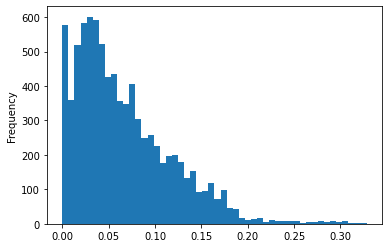

In [42]:
data['Item_Visibility'].plot.hist(bins=50)

In [0]:
import numpy as np

In [0]:
data['visi']=np.sqrt(data['Item_Visibility'])

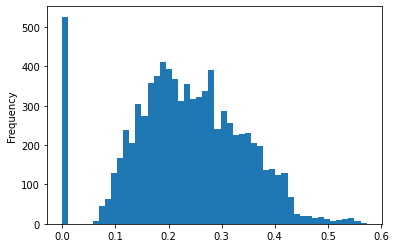

In [45]:
data['visi'].plot.hist(bins=50)

In [0]:
data['Item_Visibility']=np.log(data['Item_Visibility']*100+1)

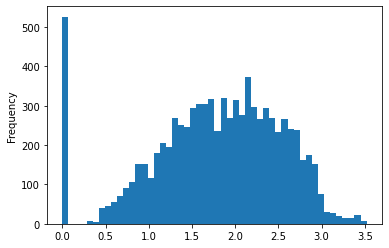

In [47]:
data['Item_Visibility'].plot.hist(bins=50)

In [0]:
dat=pd.DataFrame({'Fat':data['Item_Fat_Content'],'size':data['Outlet_Size']})

In [53]:
dat.head()

,Fat,size
0,Low Fat,Medium
1,Regular,Medium
2,Low Fat,Medium
3,Regular,Medium
4,Low Fat,High


In [0]:
dat=pd.get_dummies(dat)

In [56]:
dat.head()

,Fat_LF,Fat_Low Fat,Fat_Regular,Fat_low fat,Fat_reg,size_High,size_Medium,size_Small
0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,1,0
4,0,1,0,0,0,1,0,0


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
ss=MinMaxScaler()

In [0]:
dataa=data[['Outlet_Establishment_Year','Item_Visibility']]

In [0]:
sss=ss.fit_transform(dataa)

In [0]:
scaled=pd.DataFrame(sss,columns=['Item_weight','Item_Visibility'])

In [73]:
scaled.head()

,Item_weight,Item_Visibility
0,0.583333,0.271844
1,1.000000,0.305047
2,0.583333,0.279510
3,0.541667,0.000000
4,0.083333,0.000000


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le=LabelEncoder()

In [82]:
data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [83]:
le.fit_transform(['Medium','Small','High'])

array([1, 2, 0])

In [0]:
data['Outlet_Size']=data['Outlet_Size'].map({'Medium':1,'High':2,'Small':0})

In [86]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,visi
0,FDA15,9.3,Low Fat,0.957329,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,0.126678
1,DRC01,5.92,Regular,1.074259,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,0.138846
2,FDN15,17.5,Low Fat,0.984326,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,0.129461
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800,0.000000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052,0.000000


In [87]:
data['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDD38     9
FDQ40     9
NCL31     9
         ..
FDE52     1
FDY43     1
FDT35     1
FDQ60     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [0]:
temp=data['Item_Identifier'].value_counts()

In [0]:
data['counts']=data['Item_Identifier'].apply(lambda x:temp[x])

In [90]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,visi,counts
0,FDA15,9.3,Low Fat,0.957329,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,0.126678,8
1,DRC01,5.92,Regular,1.074259,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,0.138846,6
2,FDN15,17.5,Low Fat,0.984326,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,0.129461,7
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800,0.000000,6
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052,0.000000,6


In [92]:
for i in range(len(data)):
  if data['counts'][i]<4:
    data['Item_Identifier'][i]='others'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,visi,counts
0,FDA15,9.3,Low Fat,0.957329,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,0.126678,8
1,DRC01,5.92,Regular,1.074259,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,0.138846,6
2,FDN15,17.5,Low Fat,0.984326,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,0.129461,7
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800,0.000000,6
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052,0.000000,6
5,others,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,1,Tier 3,Supermarket Type2,556.6088,0.000000,3
6,FDO10,13.65,Regular,0.821588,Snack Foods,57.6588,OUT013,1987,2,Tier 3,Supermarket Type1,343.5528,0.112876,8
7,FDP10,<bound method Series.mean of 0 9.3\n1 ...,Low Fat,2.620820,Snack Foods,107.7622,OUT027,1985,1,Tier 3,Supermarket Type3,4022.7636,0.357029,7
8,FDH17,16.2,Regular,0.981596,Frozen Foods,96.9726,OUT045,2002,1,Tier 2,Supermarket Type1,1076.5986,0.129179,7
9,FDU28,19.2,Regular,2.346119,Frozen Foods,187.8214,OUT017,2007,1,Tier 2,Supermarket Type1,4710.5350,0.307327,5


In [0]:
bins=[0,50,200,500]
group=['Low','Med','High']


In [0]:
data['MRP_TYPES']=pd.cut(data['Item_MRP'],bins,labels=group)

In [96]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,visi,counts,MRP_TYPES
0,FDA15,9.3,Low Fat,0.957329,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,0.126678,8,High
1,DRC01,5.92,Regular,1.074259,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,0.138846,6,Low
2,FDN15,17.5,Low Fat,0.984326,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,0.129461,7,Med
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800,0.000000,6,Med
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052,0.000000,6,Med


In [0]:
da=pd.read_csv('train_bm.csv')

In [98]:
da.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [99]:
da.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
da['nan']=da['Item_Weight'].isnull()*1

In [0]:
da.head(40)

In [103]:
da.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [0]:
!unzip -q '/content/15___Implementing_DateTime_Features.zip'

In [0]:
dat=pd.read_csv('No2 dataset.csv')

In [107]:
dat.head()

,Date_Time,NO2(GT)
0,10/03/2004 18.00.00,166
1,10/03/2004 19.00.00,1174
2,10/03/2004 20.00.00,131
3,10/03/2004 21.00.00,172
4,10/03/2004 22.00.00,131


In [108]:
dat.dtypes

Date_Time    object
NO2(GT)       int64
dtype: object

In [0]:
dat['Date_Time']=pd.to_datetime(dat['Date_Time'],format='%d/%m/%Y %H.%M.%S')

In [111]:
dat.head()

,Date_Time,NO2(GT)
0,2004-03-10 18:00:00,166
1,2004-03-10 19:00:00,1174
2,2004-03-10 20:00:00,131
3,2004-03-10 21:00:00,172
4,2004-03-10 22:00:00,131


In [112]:
dat.dtypes

Date_Time    datetime64[ns]
NO2(GT)               int64
dtype: object

In [0]:
new=pd.DataFrame({'day':dat['Date_Time'].dt.day,'month':dat['Date_Time'].dt.month,'year':dat['Date_Time'].dt.year,'hour':dat['Date_Time'].dt.hour,'minutes':dat['Date_Time'].dt.minute,'name_day':dat['Date_Time'].dt.day_name(),'dayofweek':dat['Date_Time'].dt.dayofweek,'dayofyear':dat['Date_Time'].dt.dayofyear,'week':dat['Date_Time'].dt.week,'dayofweek':dat['Date_Time'].dt.dayofweek,'quater':dat['Date_Time'].dt.quarter})

In [133]:
new.head()

,day,month,year,hour,minutes,name_day,dayofweek,dayofyear,week,quater
0,10,3,2004,18,0,Wednesday,2,70,11,1
1,10,3,2004,19,0,Wednesday,2,70,11,1
2,10,3,2004,20,0,Wednesday,2,70,11,1
3,10,3,2004,21,0,Wednesday,2,70,11,1
4,10,3,2004,22,0,Wednesday,2,70,11,1


In [0]:
comp_data=pd.concat([dat,new],axis=1)

In [135]:
comp_data.head()

,Date_Time,NO2(GT),day,month,year,hour,minutes,name_day,dayofweek,dayofyear,week,quater
0,2004-03-10 18:00:00,166,10,3,2004,18,0,Wednesday,2,70,11,1
1,2004-03-10 19:00:00,1174,10,3,2004,19,0,Wednesday,2,70,11,1
2,2004-03-10 20:00:00,131,10,3,2004,20,0,Wednesday,2,70,11,1
3,2004-03-10 21:00:00,172,10,3,2004,21,0,Wednesday,2,70,11,1
4,2004-03-10 22:00:00,131,10,3,2004,22,0,Wednesday,2,70,11,1


In [139]:
comp_data['holiday']=0
for i in range(len(comp_data)):
  if (comp_data['dayofweek'][i]==5|comp_data['dayofweek'][i]==6):
    comp_data['holiday'][i]=1
  else:
    comp_data['holiday'][i]=0  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
temp=comp_data['dayofweek']==2

In [0]:
!unzip -q '/content/18___Implementing_Feature_tools.zip'

In [0]:
das=pd.read_csv('train_bm.csv')

In [160]:
das.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
import featuretools as ft

In [0]:
x=das.drop(['Item_Outlet_Sales'],axis=1)
y=das['Item_Outlet_Sales']

In [0]:
es=ft.EntitySet(id='bigmart')

In [168]:
es.entity_from_dataframe(entity_id='data1',dataframe=x,make_index=True,index='index')

Entityset: bigmart
  Entities:
    data1 [Rows: 8523, Columns: 12]
  Relationships:
    No relationships

In [0]:
feature_matrix,features_defs=ft.dfs(entityset=es,target_entity='data1',max_depth=1,trans_primitives=['add','multiply'])

In [173]:
ft.primitives.list_primitives().head(60)

,name,type,description
0,percent_true,aggregation,Finds the percent of 'True' values in a boolea...
1,last,aggregation,Returns the last value.
2,avg_time_between,aggregation,Computes the average time between consecutive ...
3,n_most_common,aggregation,Finds the N most common elements in a categori...
4,skew,aggregation,Computes the skewness of a data set.
5,all,aggregation,Test if all values are 'True'.
6,trend,aggregation,Calculates the slope of the linear trend of va...
7,max,aggregation,Finds the maximum non-null value of a numeric ...
8,std,aggregation,Finds the standard deviation of a numeric feat...
9,sum,aggregation,Sums elements of a numeric or boolean feature.


In [176]:
features_defs

[<Feature: Item_Identifier>,
 <Feature: Item_Weight>,
 <Feature: Item_Fat_Content>,
 <Feature: Item_Visibility>,
 <Feature: Item_Type>,
 <Feature: Item_MRP>,
 <Feature: Outlet_Identifier>,
 <Feature: Outlet_Establishment_Year>,
 <Feature: Outlet_Size>,
 <Feature: Outlet_Location_Type>,
 <Feature: Outlet_Type>,
 <Feature: Item_MRP + Outlet_Establishment_Year>,
 <Feature: Item_Weight + Outlet_Establishment_Year>,
 <Feature: Item_MRP + Item_Visibility>,
 <Feature: Item_Visibility + Item_Weight>,
 <Feature: Item_Visibility + Outlet_Establishment_Year>,
 <Feature: Item_MRP + Item_Weight>,
 <Feature: Item_MRP * Outlet_Establishment_Year>,
 <Feature: Item_Weight * Outlet_Establishment_Year>,
 <Feature: Item_MRP * Item_Visibility>,
 <Feature: Item_Visibility * Item_Weight>,
 <Feature: Item_Visibility * Outlet_Establishment_Year>,
 <Feature: Item_MRP * Item_Weight>]

In [177]:
feature_matrix

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_MRP + Outlet_Establishment_Year,Item_Weight + Outlet_Establishment_Year,Item_MRP + Item_Visibility,Item_Visibility + Item_Weight,Item_Visibility + Outlet_Establishment_Year,Item_MRP + Item_Weight,Item_MRP * Outlet_Establishment_Year,Item_Weight * Outlet_Establishment_Year,Item_MRP * Item_Visibility,Item_Visibility * Item_Weight,Item_Visibility * Outlet_Establishment_Year,Item_MRP * Item_Weight
index,,,,,,,,,,,,,,,,,,,,,,,
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,2248.8092,2008.300,249.825247,9.316047,1999.016047,259.1092,499368.5908,18590.700,4.008763,0.149240,32.078555,2323.225560
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,2057.2692,2014.920,48.288478,5.939278,2009.019278,54.1892,96972.8228,11893.280,0.930544,0.114127,38.729936,285.753664
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2140.6180,2016.500,141.634760,17.516760,1999.016760,159.1180,283094.3820,34982.500,2.373528,0.293301,33.503390,2478.315000
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,2180.0950,2017.200,182.095000,19.200000,1998.000000,201.2950,363825.8100,38361.600,0.000000,0.000000,0.000000,3496.224000
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,2040.8614,1995.930,53.861400,8.930000,1987.000000,62.7914,107022.6018,17743.910,0.000000,0.000000,0.000000,480.982302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2201.5218,1993.865,214.578583,6.921783,1987.056783,221.3868,426254.8166,13640.755,12.181275,0.389818,112.828594,1472.692157
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,2110.1570,2010.380,108.203982,8.426982,2002.046982,116.5370,216530.3140,16776.760,5.081479,0.393713,94.058823,906.355660
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,2089.1224,2014.600,85.157586,10.635186,2004.035186,95.7224,170585.2896,21242.400,2.995140,0.372974,70.513287,902.297440
